In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [142]:
pd.set_option('display.max_columns', None) # 전체 열 보기
pd.set_option('display.max_rows', None) # 전체 행 보기

In [2]:
import pandas as pd

In [417]:
year = str(2014)

In [71]:
crime = ['절도', '살인', '강도', '성폭력', '폭행']

* 범죄 위험 지수 계산하기 <br>
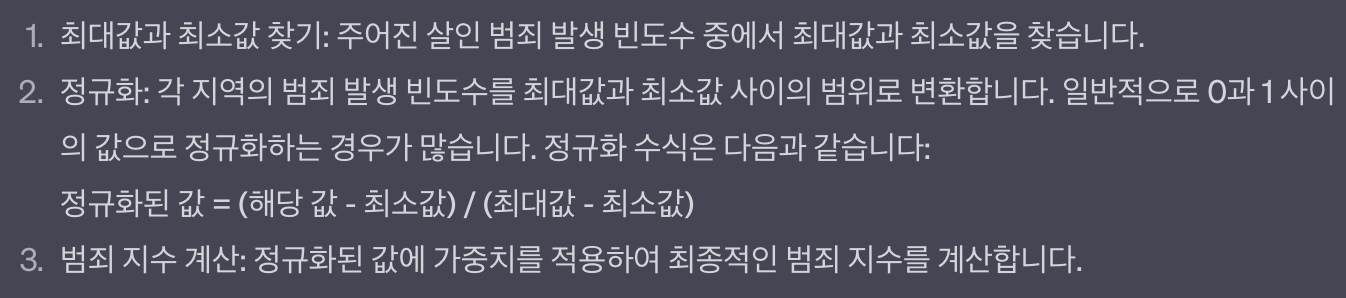

### 시간대별 데이터 병합 (한 해)

In [215]:
df1 = pd.read_excel('/content/drive/MyDrive/산업인공지능 대회/data/'+year+'-시간대별.xlsx', index_col = 0)
df1.columns = df1.loc['범죄별(1)'].values
df1 = df1.drop(['범죄별(1)'])
df1 = df1.drop(['계','미상'],axis=1)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [216]:
df1

,00:00-02:59,03:00-05:59,06:00-08:59,09:00-11:59,12:00-14:59,15:00-17:59,18:00-20:59,21:00-23:59
범죄별(1),,,,,,,,
절도,21567,21195,17918,29081,30903,34679,40322,35015
살인,82,86,65,94,91,101,135,155
강도,249,297,86,92,120,115,142,204
성폭력,2511,2651,2275,2197,2330,3059,3576,4405
폭행,20789,16233,7791,9147,9464,12069,18917,35198


In [245]:
_max = df1.loc[[crime[0]]].values.max()
_min = df1.loc[[crime[0]]].values.min()
my_value = df1.loc[[crime[0]]]
new_df1 = (my_value-_min)/(_max-_min)

for i in range(1,len(crime)):
  _max = df1.loc[[crime[i]]].values.max()
  _min = df1.loc[[crime[i]]].values.min()
  my_value = df1.loc[[crime[i]]]
  new_df1 = pd.concat([new_df1,(my_value-_min)/(_max-_min)])

new_df1 = new_df1.astype(float).round(2)

In [219]:
new_df1.to_csv('/content/drive/MyDrive/산업인공지능 대회/preprocessed_data/'+year+'-시간대별.csv',encoding='utf-8')

### 시간대별 데이터 병합 (2014~2021)

In [257]:
for _year in range(2014,2022):
  df1 = pd.read_excel('/content/drive/MyDrive/산업인공지능 대회/data/'+str(_year)+'-시간대별.xlsx', index_col = 0)
  df1.columns = df1.loc['범죄별(1)'].values
  df1 = df1.drop(['범죄별(1)'])
  df1 = df1.drop(['계','미상'],axis=1)

  _max = df1.loc[[crime[0]]].values.max()
  _min = df1.loc[[crime[0]]].values.min()
  my_value = df1.loc[[crime[0]]]
  new_df1 = (my_value-_min)/(_max-_min)

  for i in range(1,len(crime)):
    _max = df1.loc[[crime[i]]].values.max()
    _min = df1.loc[[crime[i]]].values.min()
    my_value = df1.loc[[crime[i]]]
    new_df1 = pd.concat([new_df1,(my_value-_min)/(_max-_min)])

  new_df1 = new_df1.astype(float).round(2)
  new_df1.to_csv('/content/drive/MyDrive/산업인공지능 대회/preprocessed_data/'+str(_year)+'-시간대별.csv',encoding='utf-8')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default sty

### 요일별 데이터 병합 (2014~2021)

In [254]:
df2 = pd.read_excel('/content/drive/MyDrive/산업인공지능 대회/data/'+str(2021)+'-요일별.xlsx', index_col = 0)
df2.columns = df2.loc['범죄별(1)'].values
df2 = df2.drop(['범죄별(1)'])
df2 = df2.drop(['합계'],axis=1)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [255]:
df2

,일,월,화,수,목,금,토
범죄별(1),,,,,,,
절도,21737,23478,23516,23794,24036,25275,24946
살인,95,108,97,92,88,118,94
강도,89,54,72,72,69,88,67
성폭력,4509,4928,4424,4694,4663,4769,4911
폭행,18103,15848,16147,16177,15898,17416,19926


In [256]:
for _year in range(2014,2022):
  df2 = pd.read_excel('/content/drive/MyDrive/산업인공지능 대회/data/'+str(_year)+'-요일별.xlsx', index_col = 0)
  df2.columns = df2.loc['범죄별(1)'].values
  df2 = df2.drop(['범죄별(1)'])
  df2 = df2.drop(['합계'],axis=1)
  if _year == 2014:
    df2 = df2.drop(['미상'],axis=1)

  _max = df2.loc[[crime[0]]].values.max()
  _min = df2.loc[[crime[0]]].values.min()
  my_value = df2.loc[[crime[0]]]
  new_df2 = (my_value-_min)/(_max-_min)

  for i in range(1,len(crime)):
    _max = df2.loc[[crime[i]]].values.max()
    _min = df2.loc[[crime[i]]].values.min()
    my_value = df2.loc[[crime[i]]]
    new_df2 = pd.concat([new_df2,(my_value-_min)/(_max-_min)])

  new_df2 = new_df2.astype(float).round(2)
  new_df2.to_csv('/content/drive/MyDrive/산업인공지능 대회/preprocessed_data/'+str(_year)+'-요일별.csv',encoding='utf-8')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default sty

### 지역별 데이터 병합

In [480]:
df3 = pd.read_csv('/content/drive/MyDrive/산업인공지능 대회/data/'+year+'-지역별.csv',  encoding='utf-8')
df3 = df3.drop(['범죄별(1)','범죄별(2)','2014'],axis=1)
df3 = df3.drop([0,1,2]).set_index('범죄별(3)')

In [481]:
df3 = df3.replace('-', '0')

In [482]:
df3

,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131
범죄별(3),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
절도,"59,447","2,258","2,565","1,603","1,755","3,169","1,816","2,382","2,136","1,505","1,349","2,404","2,354","1,871","2,787","2,058","2,318","2,370","1,385","3,108","1,790","3,192","2,766","3,886","4,190","2,430","21,946",918,835,780,529,"3,337","1,647","1,728","1,259","2,288","1,714","1,445",502,"1,031","1,369","1,968",596,"14,627","1,835","2,380","1,296","1,073","2,131","2,085","3,144",683,"9,751",506,252,"1,291","1,829",843,"1,858","2,398",645,104,25,"10,368","1,254","2,623","1,120","2,972","2,399","11,464","2,209","2,248","3,458","2,152","1,397","5,782","1,378",920,"1,923",658,903,"5,686","6,785","4,558","3,799","2,180","4,816","5,525","1,666","2,532","4,228","2,266","3,690","4,983","1,639","2,602","1,751","1,311","2,310","4,416","1,162","1,113","1,793","2,826","1,241","3,785","1,346","1,287","1,785","1,072","1,094",749,"1,408","1,431","1,313",572,492,"2,916","1,875","1,273","1,274",734,"1,024",805,590,695,"17,742","13,259"
살인,157,2,6,1,1,8,12,11,8,6,6,5,5,3,4,5,8,4,8,13,2,7,6,12,9,5,71,4,5,4,3,7,2,3,6,9,6,4,1,2,1,12,2,36,6,6,7,0,4,5,6,2,51,6,0,5,11,5,16,4,3,1,0,19,2,7,1,6,3,30,2,10,7,4,7,23,5,2,8,3,5,15,16,12,9,7,16,21,3,11,12,12,11,18,4,9,5,5,5,17,4,2,6,8,9,7,4,1,9,4,4,0,7,7,5,1,3,8,12,10,5,4,3,8,6,6,95,105
강도,345,11,14,7,5,16,13,14,16,21,11,8,24,4,22,12,9,12,9,11,10,25,15,36,10,10,132,7,6,3,5,21,7,6,6,18,18,3,1,1,4,20,6,68,7,21,11,4,9,5,9,2,112,7,2,16,26,4,17,28,12,0,0,53,15,9,3,16,10,82,30,11,21,10,10,32,6,2,18,3,3,27,32,28,30,12,32,37,12,5,19,7,17,25,12,13,13,8,20,33,9,14,12,22,5,7,5,5,15,11,4,0,4,8,5,3,4,17,12,10,9,13,7,5,6,5,110,85
성폭력,"8,594",307,377,269,187,328,210,205,220,220,208,294,222,867,423,241,308,426,250,352,437,471,448,761,383,180,"2,348",91,61,71,65,326,169,334,202,239,176,144,28,143,117,134,48,"1,587",278,216,162,121,248,188,312,62,"1,681",98,25,220,297,204,244,335,226,25,7,"1,050",150,224,91,315,270,805,170,144,247,107,137,534,109,77,196,68,84,530,722,579,328,467,372,354,163,175,384,188,396,370,154,228,223,133,183,369,107,134,180,230,169,283,117,123,182,139,78,68,163,142,110,32,60,368,202,156,103,91,96,149,73,59,"1,964","1,368"
폭행,"39,108","1,482","1,474","1,221","1,020","1,645","1,503","1,613","1,399","1,509","1,027","1,787","1,607","1,199","1,368","1,580","1,755","1,715","1,227","2,016","1,134","2,273","1,519","2,444","2,007","1,584","8

In [483]:
for p in df3.columns:
    df3[p] = df3[p].str.replace(',','').astype('int64')

In [485]:
df3.columns = region[1:]

In [486]:
df3

,서울,종로,중구,용산,성동,광진,동대문,중랑,성북,강북,도봉,노원,은평,서대문,마포,양천,강서,구로,금천,영등포,동작,관악,서초,강남,송파,강동,부산,중구,서구,동구,영도,부산진,동래,남구,북구,해운대,사하,금정,강서,연제,수영,사상,기장군,대구,중구,동구,서구,남구,북구,수성,달서,달성군,인천,중구,동구,서구,미추홀,연수,남동,부평,계양,강화군,옹진군,광주,동구,서구,남구,북구,광산,대전,중구,동구,서구,유성,대덕,울산,중구,동구,남구,북구,울주군,부천,수원,성남,전주,안양,청주,창원,광명,포항,안산,진주,고양,제주,목포,의정부,익산,군산,구미,천안,여수,춘천,원주,평택,경주,김해,순천,군포,남양주,강릉,충주,안동,경산,아산,거제,김천,정읍,용인,시흥,파주,양산,이천,구리,서산,제천,논산,기타 도시,도시이외
범죄별(3),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
절도,59447,2258,2565,1603,1755,3169,1816,2382,2136,1505,1349,2404,2354,1871,2787,2058,2318,2370,1385,3108,1790,3192,2766,3886,4190,2430,21946,918,835,780,529,3337,1647,1728,1259,2288,1714,1445,502,1031,1369,1968,596,14627,1835,2380,1296,1073,2131,2085,3144,683,9751,506,252,1291,1829,843,1858,2398,645,104,25,10368,1254,2623,1120,2972,2399,11464,2209,2248,3458,2152,1397,5782,1378,920,1923,658,903,5686,6785,4558,3799,2180,4816,5525,1666,2532,4228,2266,3690,4983,1639,2602,1751,1311,2310,4416,1162,1113,1793,2826,1241,3785,1346,1287,1785,1072,1094,749,1408,1431,1313,572,492,2916,1875,1273,1274,734,1024,805,590,695,17742,13259
살인,157,2,6,1,1,8,12,11,8,6,6,5,5,3,4,5,8,4,8,13,2,7,6,12,9,5,71,4,5,4,3,7,2,3,6,9,6,4,1,2,1,12,2,36,6,6,7,0,4,5,6,2,51,6,0,5,11,5,16,4,3,1,0,19,2,7,1,6,3,30,2,10,7,4,7,23,5,2,8,3,5,15,16,12,9,7,16,21,3,11,12,12,11,18,4,9,5,5,5,17,4,2,6,8,9,7,4,1,9,4,4,0,7,7,5,1,3,8,12,10,5,4,3,8,6,6,95,105
강도,345,11,14,7,5,16,13,14,16,21,11,8,24,4,22,12,9,12,9,11,10,25,15,36,10,10,132,7,6,3,5,21,7,6,6,18,18,3,1,1,4,20,6,68,7,21,11,4,9,5,9,2,112,7,2,16,26,4,17,28,12,0,0,53,15,9,3,16,10,82,30,11,21,10,10,32,6,2,18,3,3,27,32,28,30,12,32,37,12,5,19,7,17,25,12,13,13,8,20,33,9,14,12,22,5,7,5,5,15,11,4,0,4,8,5,3,4,17,12,10,9,13,7,5,6,5,110,85
성폭력,8594,307,377,269,187,328,210,205,220,220,208,294,222,867,423,241,308,426,250,352,437,471,448,761,383,180,2348,91,61,71,65,326,169,334,202,239,176,144,28,143,117,134,48,1587,278,216,162,121,248,188,312,62,1681,98,25,220,297,204,244,335,226,25,7,1050,150,224,91,315,270,805,170,144,247,107,137,534,109,77,196,68,84,530,722,579,328,467,372,354,163,175,384,188,396,370,154,228,223,133,183,369,107,134,180,230,169,283,117,123,182,139,78,68,163,142,110,32,60,368,202,156,103,91,96,149,73,59,1964,1368
폭행,39108,1482,1474,1221,1020,1645,1503,1613,1399,1509,1027,1787,1607,1199,1368,1580,1755,1715,1227,2016,1134,2273,1519,2444,2007,1584,8577,363,250,367,294,1352,630,488,619,875,778,558,119,558,508,624,194,5809,437,729,882,520,735,684,1506,316,9291,527,291,1292,1638,783,1780,1859,930,145,46,6014,802,1629,612,1704,1267,2710,796,435,859,340,280,3998,824,485,1566,352,771,3101,4172,2915,1832,1778,2285,2175,1241,938,2586,695,1971,2370,893,2129,818,956,707,1563,909,705,1257,1664,404,1396,848,837,1633,502,313,281,525,736,403,240,308,1600,1547,1121,623,684,907,286,393,75,10178,5618


In [430]:
df3.columns

Index(['범죄별(3)', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       ...
       'Unnamed: 122', 'Unnamed: 123', 'Unnamed: 124', 'Unnamed: 125',
       'Unnamed: 126', 'Unnamed: 127', 'Unnamed: 128', 'Unnamed: 129',
       'Unnamed: 130', 'Unnamed: 131'],
      dtype='object', length=129)

In [431]:
df3.loc[0].values

array([nan, '서울', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, '부산', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, '대구', nan, nan, nan, nan, nan, nan, nan,
       nan, '인천', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, '광주',
       nan, nan, nan, nan, nan, '대전', nan, nan, nan, nan, nan, '울산', nan,
       nan, nan, nan, nan, '부천', '수원', '성남', '전주', '안양', '청주', '창원', '광명',
       '포항', '안산', '진주', '고양', '제주', '목포', '의정부', '익산', '군산', '구미', '천안',
       '여수', '춘천', '원주', '평택', '경주', '김해', '순천', '군포', '남양주', '강릉', '충주',
       '안동', '경산', '아산', '거제', '김천', '정읍', '용인', '시흥', '파주', '양산', '이천',
       '구리', '서산', '제천', '논산', '기타 도시', '도시이외'], dtype=object)

In [432]:
df3.loc[1].values

array([nan, '소계', '종로', '중구', '용산', '성동', '광진', '동대문', '중랑', '성북', '강북',
       '도봉', '노원', '은평', '서대문', '마포', '양천', '강서', '구로', '금천', '영등포', '동작',
       '관악', '서초', '강남', '송파', '강동', '소계', '중구', '서구', '동구', '영도', '부산진',
       '동래', '남구', '북구', '해운대', '사하', '금정', '강서', '연제', '수영', '사상', '기장군',
       '소계', '중구', '동구', '서구', '남구', '북구', '수성', '달서', '달성군', '소계', '중구',
       '동구', '서구', '미추홀', '연수', '남동', '부평', '계양', '강화군', '옹진군', '소계',
       '동구', '서구', '남구', '북구', '광산', '소계', '중구', '동구', '서구', '유성', '대덕',
       '소계', '중구', '동구', '남구', '북구', '울주군', '소계', '소계', '소계', '소계', '소계',
       '소계', '소계', '소계', '소계', '소계', '소계', '소계', '소계', '소계', '소계', '소계',
       '소계', '소계', '소계', '소계', '소계', '소계', '소계', '소계', '소계', '소계', '소계',
       '소계', '소계', '소계', '소계', '소계', '소계', '소계', '소계', '소계', '소계', '소계',
       '소계', '소계', '소계', '소계', '소계', '소계', '소계', '소계', '소계'], dtype=object)

In [433]:
region=['범죄별', '서울', '종로', '중구', '용산', '성동', '광진', '동대문', '중랑', '성북', '강북',
       '도봉', '노원', '은평', '서대문', '마포', '양천', '강서', '구로', '금천', '영등포', '동작',
       '관악', '서초', '강남', '송파', '강동', '부산', '중구', '서구', '동구', '영도', '부산진',
       '동래', '남구', '북구', '해운대', '사하', '금정', '강서', '연제', '수영', '사상', '기장군',
       '대구', '중구', '동구', '서구', '남구', '북구', '수성', '달서', '달성군', '인천', '중구',
       '동구', '서구', '미추홀', '연수', '남동', '부평', '계양', '강화군', '옹진군', '광주',
       '동구', '서구', '남구', '북구', '광산', '대전', '중구', '동구', '서구', '유성', '대덕',
       '울산', '중구', '동구', '남구', '북구', '울주군', '부천', '수원', '성남', '전주', '안양', '청주', '창원', '광명',
       '포항', '안산', '진주', '고양', '제주', '목포', '의정부', '익산', '군산', '구미', '천안',
       '여수', '춘천', '원주', '평택', '경주', '김해', '순천', '군포', '남양주', '강릉', '충주',
       '안동', '경산', '아산', '거제', '김천', '정읍', '용인', '시흥', '파주', '양산', '이천',
       '구리', '서산', '제천', '논산','기타 도시', '도시이외']

In [434]:
df3.columns = region

### 지역별 데이터 병합(2014~2021)

In [ ]:
region=['범죄별',

       '서울', '종로', '중구', '용산', '성동', '광진', '동대문', '중랑', '성북', '강북',
       '도봉', '노원', '은평', '서대문', '마포', '양천', '강서', '구로', '금천', '영등포', '동작',
       '관악', '서초', '강남', '송파', '강동',

       '부산', '중구', '서구', '동구', '영도', '부산진',
       '동래', '남구', '북구', '해운대', '사하', '금정', '강서', '연제', '수영', '사상', '기장군',

       '대구', '중구', '동구', '서구', '남구', '북구', '수성', '달서', '달성군',

       '인천', '중구','동구', '서구', '미추홀', '연수', '남동', '부평', '계양', '강화군', '옹진군',

       '광주','동구', '서구', '남구', '북구', '광산',

       '대전', '중구', '동구', '서구', '유성', '대덕',

       '울산', '중구', '동구', '남구', '북구', '울주군',

       '부천', '수원', '성남', '전주', '안양', '청주', '창원', '광명',
       '포항', '안산', '진주', '고양', '제주', '목포', '의정부', '익산', '군산', '구미', '천안',
       '여수', '춘천', '원주', '평택', '경주', '김해', '순천', '군포', '남양주', '강릉', '충주',
       '안동', '경산', '아산', '거제', '김천', '정읍', '용인', '시흥', '파주', '양산', '이천',
       '구리', '서산', '제천', '논산','기타 도시', '도시이외']

In [487]:
for _year in range(2014,2022):
  df3 = pd.read_csv('/content/drive/MyDrive/산업인공지능 대회/data/'+year+'-지역별.csv',  encoding='utf-8')
  df3 = df3.drop(['범죄별(1)','범죄별(2)','2014'],axis=1)
  df3 = df3.drop([0,1,2]).set_index('범죄별(3)')
  df3 = df3.replace('-', '0')
  for p in df3.columns:
    df3[p] = df3[p].str.replace(',','').astype('int64')
  df3.columns = region[1:]

  _max = df3.loc[[crime[0]]].values.max()
  _min = df3.loc[[crime[0]]].values.min()
  my_value = df3.loc[[crime[0]]]
  new_df3 = (my_value-_min)/(_max-_min)

  for i in range(1,len(crime)):
    _max = df3.loc[[crime[i]]].values.max()
    _min = df3.loc[[crime[i]]].values.min()
    my_value = df3.loc[[crime[i]]]
    new_df3 = pd.concat([new_df3,(my_value-_min)/(_max-_min)])

  new_df3 = new_df3.astype(float).round(2)
  new_df3.to_csv('/content/drive/MyDrive/산업인공지능 대회/preprocessed_data/'+str(_year)+'-지역별.csv',encoding='utf-8')

### 장소별 데이터 병합

In [389]:
df4 = pd.read_csv('/content/drive/MyDrive/산업인공지능 대회/data/장소별.csv', encoding='utf-8',index_col=0)

In [390]:
df4['Unnamed: 49']['강도'] = '1'

In [391]:
df4

,2014,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,2015,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,2016,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,2017,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,2018,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,2019,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,2020,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,2021,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
범죄별(1),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,아파트ㆍ연립ㆍ다세대,단독주택,노상,숙박업소ㆍ 목욕탕,유흥접객업소,사무실,공장,아파트ㆍ연립ㆍ다세대,단독주택,노상,숙박업소ㆍ 목욕탕,유흥접객업소,사무실,공장,아파트ㆍ연립ㆍ다세대,단독주택,노상,숙박업소ㆍ 목욕탕,유흥접객업소,사무실,공장,아파트ㆍ연립ㆍ다세대,단독주택,노상,숙박업소ㆍ 목욕탕,유흥접객업소,사무실,공장,아파트ㆍ연립ㆍ다세대,단독주택,노상,숙박업소ㆍ 목욕탕,유흥접객업소,사무실,공장,아파트ㆍ연립ㆍ다세대,단독주택,노상,숙박업소ㆍ 목욕탕,유흥접객업소,사무실,공장,아파트ㆍ연립ㆍ다세대,단독주택,노상,숙박업소ㆍ 목욕탕,유흥접객업소,사무실,공장,아파트ㆍ연립ㆍ다세대,단독주택,노상,숙박업소ㆍ 목욕탕,유흥접객업소,사무실,공장
절도,"14,336","19,516","49,530","6,736","13,953","6,254","2,413","11,043","15,566","45,312","5,167","12,370","5,473","1,717","8,778","13,228","39,363","4,409","11,739","3,954","1,075","7,038","9,045","36,808","3,559","9,985","3,096","1,022","11,519","11,544","39,959","6,254","15,445","3,576","1,179","14,345","11,450","45,543","6,142","15,700","3,241","1,066","16,703","10,197","46,862","4,326","12,642","3,330","1,261","16,485","8,535","46,374","2,666","7,116","2,288",970
살인,186,197,185,37,37,22,8,176,190,177,24,42,21,2,162,189,156,29,49,19,5,182,161,136,34,40,21,3,214,192,128,28,58,26,5,228,174,145,27,49,14,5,211,172,138,17,36,24,3,211,124,132,30,33,16,5
강도,138,182,423,90,101,33,3,99,143,408,109,85,32,5,74,114,339,68,75,31,3,83,87,261,71,62,25,3,78,85,252,80,58,23,3,106,89,221,79,53,21,1,79,54,164,63,62,19,1,78,47,114,47,27,15,2
성폭력,"2,584","2,629","4,919","2,604","2,115",655,60,"2,440","2,683","4,748","2,611","2,097",712,36,"2,597","2,513","3,962","2,526","2,351",637,62,"2,845","2,431","4,448","2,673","2,588",596,55,"3,679","3,030","3,928","3,397","4,018",690,46,"4,127","2,790","3,909","3,556","4,281",659,62,"4,391","2,886","3,533","3,414","3,874",715,51,"5,541","3,571","3,378","3,271","2,190",852,70
폭행,"7,915","6,869","58,095","1,052","12,158","2,888",426,"11,179","9,317","59,353",942,"10,930","2,739",460,"12,634","9,720","61,708",973,"11,459","2,791",490,"11,949","8,380","60,975","1,079","12,419","2,818",456,"21,862","14,834","63,415","2,337","23,513","3,840",747,"25,373","15,367","60,830","2,236","22,858","3,685",715,"23,483","13,491","53,395","1,840","19,382","3,359",693,"23,814","12,770","42,680","1,943","9,558","2,988",665


In [392]:
place = ['아파트ㆍ연립ㆍ다세대',	'단독주택',	'노상',	'숙박업소ㆍ 목욕탕',	'유흥접객업소',	'사무실',	'공장']

In [393]:
index = 2
year = 2014

In [394]:
df4 = df4[[str(year),'Unnamed: '+str(index),'Unnamed: '+str(index+1),'Unnamed: '+str(index+2),'Unnamed: '+str(index+3),'Unnamed: '+str(index+4),'Unnamed: '+str(index+5)]]
df4.columns = df4.iloc[0].values
df4 = df4.drop(df4.index[0],axis=0)

In [395]:
for p in range(len(place)):
  df4[place[p]] = df4[place[p]].str.replace(',','').astype('int64')

In [396]:
df4

,아파트ㆍ연립ㆍ다세대,단독주택,노상,숙박업소ㆍ 목욕탕,유흥접객업소,사무실,공장
범죄별(1),,,,,,,
절도,14336,19516,49530,6736,13953,6254,2413
살인,186,197,185,37,37,22,8
강도,138,182,423,90,101,33,3
성폭력,2584,2629,4919,2604,2115,655,60
폭행,7915,6869,58095,1052,12158,2888,426


In [397]:
_max = df4.loc[[crime[0]]].values.max()
_min = df4.loc[[crime[0]]].values.min()
my_value = df4.loc[[crime[0]]]
new_df4 = (my_value-_min)/(_max-_min)

for i in range(1,len(crime)):
  _max = df4.loc[[crime[i]]].values.max()
  _min = df4.loc[[crime[i]]].values.min()
  my_value = df4.loc[[crime[i]]]
  new_df4 = pd.concat([new_df4,(my_value-_min)/(_max-_min)])

new_df4 = new_df4.astype(float).round(2)

In [398]:
new_df4

,아파트ㆍ연립ㆍ다세대,단독주택,노상,숙박업소ㆍ 목욕탕,유흥접객업소,사무실,공장
범죄별(1),,,,,,,
절도,0.25,0.36,1.00,0.09,0.24,0.08,0.00
살인,0.94,1.00,0.94,0.15,0.15,0.07,0.00
강도,0.32,0.43,1.00,0.21,0.23,0.07,0.00
성폭력,0.52,0.53,1.00,0.52,0.42,0.12,0.00
폭행,0.13,0.11,1.00,0.01,0.20,0.04,0.00


### 장소별 데이터 병합 (2014~2021)

In [400]:
place = ['아파트ㆍ연립ㆍ다세대',	'단독주택',	'노상',	'숙박업소ㆍ 목욕탕',	'유흥접객업소',	'사무실',	'공장']
index = 2
year = 2014

for _year in range(2014,2022):
  df4 = pd.read_csv('/content/drive/MyDrive/산업인공지능 대회/data/장소별.csv', encoding='utf-8',index_col=0)
  df4['Unnamed: 49']['강도'] = '1'
  df4 = df4[[str(year),'Unnamed: '+str(index),'Unnamed: '+str(index+1),'Unnamed: '+str(index+2),'Unnamed: '+str(index+3),'Unnamed: '+str(index+4),'Unnamed: '+str(index+5)]]
  df4.columns = df4.iloc[0].values
  df4 = df4.drop(df4.index[0],axis=0)

  for p in range(len(place)):
    df4[place[p]] = df4[place[p]].str.replace(',','').astype('int64')

  _max = df4.loc[[crime[0]]].values.max()
  _min = df4.loc[[crime[0]]].values.min()
  my_value = df4.loc[[crime[0]]]
  new_df4 = (my_value-_min)/(_max-_min)

  for i in range(1,len(crime)):
    _max = df4.loc[[crime[i]]].values.max()
    _min = df4.loc[[crime[i]]].values.min()
    my_value = df4.loc[[crime[i]]]
    new_df4 = pd.concat([new_df4,(my_value-_min)/(_max-_min)])

  new_df4 = new_df4.astype(float).round(2)
  new_df4.to_csv('/content/drive/MyDrive/산업인공지능 대회/preprocessed_data/'+str(_year)+'-장소별.csv',encoding='utf-8')
  year+=1
  index+=7